***
## Table of Contents
<br>
    <ol><h2><a href='#0' style="text-decoration : none; color : #000000;">1. Loading and Cleaning Data </a></h2> </ol>
    <br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">2. Initial Models</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br> 

<ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">3. Feature Transformation with feature selection </a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">4. Feature Transformation with PCA</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">5. Comparing Results</a></h2>  
     </ol>
     <br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import researchpy as rp

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
# from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score,precision_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import featuretools as ft

from scipy import stats

Using TensorFlow backend.


In [2]:
### Function to plot Feature Importance

def feat_impt_plot(feat_impt,width_s=1000,height_s=1000):
    data = [go.Bar(x=feat_impt.values,y=feat_impt.index.values,text=np.round(feat_impt,4),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6,
            orientation='h'
        )]
    layout = go.Layout(autosize=False,
    width=width_s,
    height=height_s,
    xaxis=dict(title='Feature Importances',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(automargin=True))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 

### The dataset contains http elements present on the specified domain
### <a id='0' style="text-decoration : none; color : #000000;"> 1. Loading and Cleaning Data</a>

In [3]:
df=pd.read_csv('Html.csv')
df.fillna(value=0,inplace=True)
df.drop(['Malicious'],axis=1,inplace=True)
df.drop(['number_of_unsecure_cookies','number_of_secure_cookies','number_of_non_http_only_cookies','number_of_http_only_cookies',
 'number_of_cookies'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df=df[df['domain']!=0]
df.sort_values(by='Target',inplace=True,ascending=False)

df.drop_duplicates(['domain'], keep='first',inplace=True)

df=df.sample(frac=1,random_state=0)
df.set_index(['domain'],drop=True,inplace=True)
df.Target=df.Target.apply(lambda x: 'Malicious' if x==1 else 'Non_Malicious')
display(df.head())
print("Shape of our dataset:",df.shape)

,a_charset_utf-8,a_count,a_download_download,a_hidden_true,a_href_.7z,a_href_.apk,a_href_.app,a_href_.asp,a_href_.aspx,a_href_.au,a_href_.avi,a_href_.b,a_href_.bin,a_href_.br,a_href_.bz2,a_href_.ca,a_href_.cat,a_href_.cc,a_href_.cfm,a_href_.cgi,a_href_.ch,a_href_.chn,a_href_.cl,a_href_.cms,a_href_.com,a_href_.csp,a_href_.css,a_href_.data,a_href_.de,a_href_.dmg,a_href_.do,a_href_.doc,a_href_.docx,a_href_.dot,a_href_.dz,a_href_.end,a_href_.exe,a_href_.fx,a_href_.gif,a_href_.gsp,a_href_.gz,a_href_.htm,a_href_.html,a_href_.i,a_href_.id,a_href_.io,a_href_.iso,a_href_.it,a_href_.jhtml,a_href_.jpeg,a_href_.jpg,a_href_.js,a_href_.jsf,a_href_.json,a_href_.jsp,a_href_.lnk,a_href_.m3u,a_href_.md,a_href_.me,a_href_.mhp,a_href_.mp3,a_href_.mp4,a_href_.mpl,a_href_.mvc,a_href_.net,a_href_.ogg,a_href_.org,a_href_.pcf,a_href_.pd,a_href_.pdf,a_href_.php,a_href_.phtml,a_href_.pk,a_href_.pl,a_href_.pls,a_href_.png,a_href_.prd,a_href_.pro,a_href_.rar,a_href_.rdf,a_href_.rf,a_href_.rss,a_href_.ru,a_href_.shtml,a_href_.spa,a_href_.svg,a_href_.swf,a_href_.tag,a_href_.tmpl,a_href_.tr,a_href_.tsp,a_href_.tv,a_href_.txt,a_href_.vid,a_href_.wml,a_href_.wmv,a_href_.x,a_href_.xhtml,a_href_.xls,a_href_.xlsx,a_href_.xml,a_href_.xxx,a_href_.xyz,a_href_.xz,a_href_.zip,a_href_0,a_href_0.1,a_href_0.2,a_href_absolute,a_href_ftp,a_href_http,a_href_https,a_href_irc,a_href_mailto,a_href_out_of_domain,a_href_relative,a_href_script_javascript,a_hreflang_am,a_hreflang_ar,a_hreflang_az,a_hreflang_bs,a_hreflang_ca,a_hreflang_cs,a_hreflang_de,a_hreflang_el,a_hreflang_en,a_hreflang_en-gb,a_hreflang_en-us,a_hreflang_es,a_hreflang_es-ES,a_hreflang_fi,a_hreflang_fr,a_hreflang_hu,a_hreflang_id,a_hreflang_it,a_hreflang_ja,a_hreflang_ko,a_hreflang_ml,a_hreflang_nl,a_hreflang_no,a_hreflang_pl,a_hreflang_pt,a_hreflang_pt-br,a_hreflang_ro,a_hreflang_ru,a_hreflang_sv,a_hreflang_tr,a_hreflang_und,a_hreflang_zh,a_hreflang_zh-hans,a_hreflang_zxx,a_lang_a1,a_lang_ar,a_lang_bg,a_lang_ca,a_lang_cs,a_lang_da,a_lang_de,a_lang_el,a_lang_en,a_lang_en-GB,a_lang_en-US,a_lang_es,a_lang_es-ES,a_lang_fi,a_lang_fr,a_lang_he,a_lang_hi,a_lang_hr,a_lang_hu,a_lang_id,a_lang_it,a_lang_ja,a_lang_ko,a_lang_nl,a_lang_pl,a_lang_pt,a_lang_ro,a_lang_ru,a_lang_sk,a_lang_sv,a_lang_th,a_lang_tr,a_lang_vi,a_lang_zh,a_referrerpolicy_unsafe-url,a_rel_ nofollow,a_rel_ noopener,a_rel_ noopener noreferrer,a_rel_ noreferrer noopener,"a_rel_""nofollow""",a_rel_#modal-overlay,a_rel_#modalExternalSiteCluetip,a_rel_#selectFiliale,a_rel_'nofollow',a_rel_0,a_rel_1,a_rel_10,a_rel_11,a_rel_12,a_rel_13,a_rel_14,a_rel_15,a_rel_16,a_rel_17,a_rel_2,a_rel_3,a_rel_4,a_rel_5,a_rel_6,a_rel_7,a_rel_8,a_rel_9,a_rel_<strong>@font-face Embedding</strong> - this free license allows you to embed the font in your websites with CSS.,a_rel_<strong>Commercial Desktop Use</strong> - this free license allows you to create commercial graphics and documents.,a_rel_Akamai-prefetch,a_rel_Dofollow,a_rel_F,a_rel_Lightbox,a_rel_Menu,a_rel_NOFOLLOW,a_rel__blank,a_rel_about,a_rel_accounts,a_rel_ajaxcontentarea,a_rel_alternate,a_rel_alternate noopener noreferrer,a_rel_archive,a_rel_article,a_rel_attachment,a_rel_author,a_rel_author external,a_rel_author source external,a_rel_blank,a_rel_bookmark,a_rel_bookmark noopener,a_rel_box,a_rel_canonical,a_rel_category,a_rel_category tag,a_rel_category tag noopener noreferrer,a_rel_chapter,a_rel_chartPopup nofollow,a_rel_cklog,a_rel_contact,a_rel_contents,a_rel_countrycontainer,a_rel_date,a_rel_ddsubmenuside1,a_rel_default,...,object_data_http,object_data_https,object_data_out_of_domain,object_data_relative,object_style_display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1;,object_style_display: none;,object_type_application/x-shockwave-flash,object_type_image/svg+xml,object_type_text/html,ol_count,optgroup_count,option_count,output_count,p_count,param_count,picture_count,pre_count,progress_count,q_count,s_count,samp_count,script_async

Shape of our dataset: (43491, 1461)


#### Let us analyze the balance of classes

In [4]:
data = [go.Bar(x=df.Target.value_counts().index.values,
               y=df.Target.value_counts().values,
               text=df.Target.value_counts().values,
               textposition = 'outside',
            )]
layout = go.Layout( xaxis=dict(title='Domain Type',tickfont=dict(size=12,color='black')),
                    yaxis=dict(title='Number of Instances'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### We can see from the graph that there is high imbalance in the dataset. We can handle it either by oversampling, undersampling or tuning our models to focus on recall/precision to address the problem

#### Cleaning and analyzing the dataset.


#### We know that many of the features will all have no more than one unique value. Hence, we will first identify and drop those features

#### Columns which have do not have any unique values

In [5]:
col_no_unique=[]
for col in df.columns[:-1]:
    if len(df[col].value_counts())==1:
        print(col)
        col_no_unique.append(col)

print("{} columns have only one unique value in them rendering them less meaningless for classification".format(len(col_no_unique)))

### Drop those columns
df.drop(col_no_unique,axis=1,inplace=True)

print("Shape of our dataset after dropping them:",df.shape)

0 columns have only one unique value in them rendering them less meaningless for classification
Shape of our dataset after dropping them: (43491, 1461)


In [6]:
### Check and converting data types
df['Target']=df.Target.apply(lambda x: 1 if x=='Malicious' else 0)

print("Columns which are of type object:",df.dtypes[(df.dtypes=='object')])

Columns which are of type object: Series([], dtype: object)


#### All of our features are either numerical  in nature.

#### Check for missing data

In [7]:
df.isnull().sum()

a_charset_utf-8                                          0
a_count                                                  0
a_download_download                                      0
a_hidden_true                                            0
a_href_.7z                                               0
a_href_.apk                                              0
a_href_.app                                              0
a_href_.asp                                              0
a_href_.aspx                                             0
a_href_.au                                               0
a_href_.avi                                              0
a_href_.b                                                0
a_href_.bin                                              0
a_href_.br                                               0
a_href_.bz2                                              0
a_href_.ca                                               0
a_href_.cat                                             

#### No missing data exists

#### Next check to see which features have less than 5% varying data

In [8]:
lst=[]
for col in df.columns[:-1]:
    lst.append([col,dict(df[col].value_counts()),df[col].value_counts().values[0]>=len(df)*0.95])

col_values=pd.DataFrame(lst,columns=['Feature','Value_Counts','95_%_same_values'])
col_values.set_index('Feature',drop=True,inplace=True)
del lst
col_values.head(5)

,Value_Counts,95_%_same_values
Feature,,
a_charset_utf-8,"{0.0: 43488, 1.0: 2, 26.0: 1}",True
a_count,"{0.0: 10041, 1.0: 549, 7.0: 539, 2.0: 426, 3.0...",False
a_download_download,"{0.0: 43487, 2.0: 2, 31.0: 1, 4.0: 1}",True
a_hidden_true,"{0.0: 43450, 1.0: 33, 2.0: 4, 7.0: 1, 118.0: 1...",True
a_href_.7z,"{0.0: 43487, 2.0: 2, 45.0: 1, 1.0: 1}",True


In [9]:
col_values['95_%_same_values'].value_counts()

True     1297
False     163
Name: 95_%_same_values, dtype: int64

### <a id='1' style="text-decoration : none; color : #000000;"> 2. Initial Models</a>

In [10]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['a_count',
 'a_href_.aspx',
 'a_href_.com',
 'a_href_.htm',
 'a_href_.html',
 'a_href_.pdf',
 'a_href_.php',
 'a_href_0',
 'a_href_absolute',
 'a_href_http',
 'a_href_https',
 'a_href_mailto',
 'a_href_out_of_domain',
 'a_href_relative',
 'a_href_script_javascript',
 'a_rel_nofollow',
 'article_count',
 'aside_count',
 'b_count',
 'base_count',
 'base_href_absolute',
 'base_href_out_of_domain',
 'base_href_relative',
 'br_count',
 'button_count',
 'center_count',
 'dd_count',
 'div_count',
 'dl_count',
 'dt_count',
 'em_count',
 'fieldset_count',
 'figure_count',
 'font_count',
 'footer_count',
 'form_action_.php',
 'form_action_absolute',
 'form_action_http',
 'form_action_https',
 'form_action_out_of_domain',
 'form_action_relative',
 'form_count',
 'form_enctype_application/x-www-form-urlencoded',
 'h1_count',
 'header_count',
 'hr_count',
 'i_count',
 'iframe_count',
 'iframe_sandbox_allow_same_origin_count',
 'iframe_sandbox_allow_scripts_count',
 'iframe_src_.com',
 'iframe_src_

#### lets see if for the rest of continuous variables if there exists any relationship using Point biserial correlation.
####  The PointBiserial Correlation is a special case of Pearson co-rrelation for Correlation between continuous and dichotomus binary variable. 

In [11]:
lst=[]
for col in columns:
    corr=stats.pointbiserialr(df[col],df.Target)[0]
    corr_p=stats.pointbiserialr(df[col],df.Target)[1]
    ttest=stats.ttest_ind(df[df.Target==1][col], df[df.Target==0][col], equal_var=False)[0]
    ttest_p=stats.ttest_ind(df[df.Target==1][col], df[df.Target==0][col], equal_var=False)[1]
    lst.append((corr,corr_p,ttest,ttest_p,col))

stats_df=pd.DataFrame(lst,columns=['Pt. Biserial Corr','Pt. Biserial Corr p-val','ttest','ttest p-val','Feature'])
stats_df.set_index('Feature',drop=True,inplace=True)
stats_df.sort_values(by='ttest',inplace=True)
del lst
stats_df

,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
script_src_.js,-0.319546,0.000000e+00,-142.596194,0.000000e+00
script_count,-0.315619,0.000000e+00,-142.448699,0.000000e+00
script_src_relative,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_absolute,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_https,-0.271077,0.000000e+00,-126.553948,0.000000e+00
script_async_true,-0.245742,0.000000e+00,-118.214320,0.000000e+00
link_rel_canonical,-0.276351,0.000000e+00,-114.117813,0.000000e+00
div_count,-0.231558,0.000000e+00,-113.026088,0.000000e+00
script_type_text/javascript,-0.264055,0.000000e+00,-111.582561,0.000000e+00


#### The ttest conduncted supports the results of point biserial correlation. 

#### Hence, we see that all the features we selected are related to the dependent variable.

### Lets start by building some basic models 

### top 25 columns

In [12]:
### Preparing our training and test sets
columns=stats_df[0:50].index.values
X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [13]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='1.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [14]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.881467003909


Predicted  False  True  __all__
Actual                         
False      25911  3791    29702
True         333  4757     5090
__all__    26244  8548    34792

The accuracy of the model on test data is: 0.875847798598


Predicted  False  True  __all__
Actual                         
False       6445   967     7412
True         113  1174     1287
__all__     6558  2141     8699

#### <a id='1.B' style="text-decoration : none; color : #000000;"> B. Random Forest Classifier</a>

In [15]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.901011726834


Predicted  False  True  __all__
Actual                         
False      26370  3332    29702
True         112  4978     5090
__all__    26482  8310    34792

The accuracy of the model on test data is: 0.892171513967


Predicted  False  True  __all__
Actual                         
False       6584   828     7412
True         110  1177     1287
__all__     6694  2005     8699

In [16]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
script_count,0.202815
a_href_absolute,0.190330
a_count,0.079283
a_href_relative,0.072423
script_src_relative,0.069657
script_src_absolute,0.065874
link_href_out_of_domain,0.023382
div_count,0.021329
link_href_absolute,0.016632
script_src_.js,0.015643


#### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Extra Tree Classifier</a>

In [17]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.90267877673


Predicted  False  True  __all__
Actual                         
False      26384  3318    29702
True          68  5022     5090
__all__    26452  8340    34792

The accuracy of the model on test data is: 0.892056558225


Predicted  False  True  __all__
Actual                         
False       6588   824     7412
True         115  1172     1287
__all__     6703  1996     8699

In [18]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
img_src_absolute,0.062219
script_src_absolute,0.060653
a_href_https,0.055094
link_href_absolute,0.051708
script_type_text/javascript,0.051417
script_src_.js,0.041396
link_type_text/css,0.039666
link_href_.ico,0.037672
a_href_absolute,0.036101
link_rel_stylesheet,0.033990


In [19]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

#### The results are good. The models seem to be perfoming well and have a good FPR and FNR. Next we will perform feature tranformations to see how we can improve results

### <a id='2' style="text-decoration : none; color : #000000;"> 3. Feature Transformation with feature selection</a>

In [20]:
df.reset_index(inplace=True)

columns=columns.tolist()
columns.append('domain')

df_min=df[columns]

In [21]:
es = ft.EntitySet(id = 'malicious')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_min, index = 'domain')

Entityset: malicious
  Entities:
    data [Rows: 43491, Columns: 51]
  Relationships:
    No relationships

In [22]:
feature_matrix_sessions, features_defs = ft.dfs(entityset=es,target_entity="data",
                                                trans_primitives = ['add','divide','multiply'],n_jobs=-1,
                                                verbose=1,max_depth=1)

Built 4950 features
EntitySet scattered to workers in 7.608 seconds
Elapsed: 00:50 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [23]:
def create_fun(columns,data):
    for col_i in columns:
        for col_j in columns:
            if col_i!=col_j:
                #### Addition
                new_col= str(col_i) +str(' + ') +str(col_j)
                data[new_col]=data[col_i]+data[col_j]
                
                #### Multiplication
                new_col= str(col_i) +str(' * ') +str(col_j)
                data[new_col]=data[col_i]+data[col_j]
                
                #### Division
                new_col= str(col_i) +str(' / ') +str(col_j)
                data[new_col]=data[col_i]/data[col_j]

#### Lets have a look at the feature set generated

In [24]:
feature_matrix_sessions.head()

,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,img_src_https,iframe_src_absolute,iframe_src_relative,link_rel_shortcut icon,iframe_src_https,a_href_https,link_href_.ico,link_count,link_href_relative,link_href_absolute,link_rel_stylesheet,img_src_.jpg,link_rel_icon,img_src_out_of_domain,link_href_.png,link_href_.css,ul_count,li_count,link_href_out_of_domain,link_type_image/x-icon,link_rel_manifest,iframe_src_.html,span_count,iframe_src_out_of_domain,form_action_relative,img_src_.png,form_action_absolute,link_type_text/css,link_rel_apple-touch-icon,link_type_image/png,a_href_out_of_domain + form_action_absolute,iframe_src_relative + link_rel_apple-touch-icon,iframe_count + link_href_.css,link_href_https + script_async_true,iframe_src_absolute + span_count,iframe_src_relative + ul_count,iframe_src_relative + link_rel_manifest,iframe_src_out_of_domain + img_count,link_rel_stylesheet + link_type_image/x-icon,link_rel_canonical + link_rel_icon,img_src_.jpg + script_count,link_type_text/css + script_src_https,script_src_out_of_domain + script_type_text/javascript,a_href_absolute + link_href_https,iframe_src_absolute + iframe_src_relative,script_src_.js + script_src_https,link_rel_canonical + script_async_true,link_href_.ico + script_src_out_of_domain,form_action_absolute + img_src_absolute,img_src_out_of_domain + script_src_relative,link_rel_icon + link_rel_shortcut icon,img_src_.png + link_href_relative,img_src_absolute + script_src_absolute,link_rel_icon + ul_count,link_href_absolute + link_rel_apple-touch-icon,img_src_absolute + link_rel_icon,iframe_src_out_of_domain + script_count,a_count + link_rel_icon,link_rel_shortcut icon + script_src_out_of_domain,meta_http-equiv_X-UA-Compatible + script_src_https,link_href_relative + ul_count,a_count + img_src_out_of_domain,script_src_.js + ul_count,form_action_relative + link_href_out_of_domain,iframe_count + link_rel_icon,link_count + link_href_relative,iframe_src_out_of_domain + link_href_absolute,link_href_absolute + script_src_.js,a_href_relative + link_href_relative,img_src_https + script_type_text/javascript,link_href_relative + meta_http-equiv_X-UA-Compatible,link_href_.ico + link_rel_shortcut icon,form_action_relative + iframe_src_https,iframe_src_https + link_href_absolute,link_rel_icon + script_src_out_of_domain,img_src_absolute + link_href_https,a_href_https + link_href_.png,link_href_out_of_domain + span_count,iframe_src_absolute + script_count,link_rel_canonical + span_count,iframe_src_absolute + link_count,iframe_src_out_of_domain + img_src_out_of_domain,link_rel_manifest + script_src_out_of_domain,link_href_.png + link_href_relative,form_action_relative + img_src_https,form_action_absolute + link_href_relative,a_href_https + script_src_out_of_domain,div_count + iframe_src_absolute,script_count + script_src_relative,img_src_.jpg + link_type_image/png,link_rel_apple-touch-icon + script_src_.js,form_action_relative + script_src_out_of_domain,link_href_relative + link_rel_stylesheet,link_type_text/css + script_src_relative,a_href_out_of_domain + script_async_true,form_action_absolute + link_rel_manifest,li_count + script_src_out_of_domain,iframe_src_relative + img_src_https,div_count + link_type_image/x-icon,link_href_.png + link_rel_apple-touch-icon,a_href_relative + link_href_https,form_action_absolute + iframe_count,link_rel_manifest + script_src_relative,img_src_out_of_domain + link_rel_apple-touch-icon,a_count + iframe_src_relative,img_count + link_rel_apple-touch-icon,iframe_src_https + link_href_.css,iframe_src_absolute + iframe_src_https,link_count + script_src_relative,img_count + link_href_.css,a_href_absolute + img_src_absolute,form_action_relative + script_src_relati

In [25]:
df.set_index(['domain'],drop=True,inplace=True)

fs=pd.merge(feature_matrix_sessions,pd.DataFrame(df.Target),left_index=True, right_index=True)

In [26]:
fs.replace([np.inf],0,inplace=True)

#### Now we have a very huge feature-set and generally more features can cause over-fitting. Hence, we will use a combination of feature selection techniques to select only a few from them.

In [27]:
X=fs.loc[:,fs.columns!='Target']
y=fs.Target
feature_name = X.columns.tolist()

In [29]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)

In [30]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

In [31]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

In [32]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [33]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [55]:
X=fs[feature_selection_df[feature_selection_df.Total>=2]['Feature']]
X.fillna(value=0,inplace=True)
y=fs.Target.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(43491, 62)

In [56]:
## Table to store training and test measures so we can compare later
table_80_60_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_60_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [57]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.888250172453


Predicted  False  True  __all__
Actual                         
False      26169  3532    29701
True         356  4735     5091
__all__    26525  8267    34792

The accuracy of the model on test data is: 0.886193815381


Predicted  False  True  __all__
Actual                         
False       6531   882     7413
True         108  1178     1286
__all__     6639  2060     8699

#### <a id='2.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [58]:
rf=RandomForestClassifier()
X_train=np.round(X_train,5)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.897677627041


Predicted  False  True  __all__
Actual                         
False      26289  3412    29701
True         148  4943     5091
__all__    26437  8355    34792

The accuracy of the model on test data is: 0.890562133579


Predicted  False  True  __all__
Actual                         
False       6566   847     7413
True         105  1181     1286
__all__     6671  2028     8699

In [61]:
f_r=pd.DataFrame(rf.feature_importances_,index=feature_name)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
link_count + script_count,0.133739
link_href_out_of_domain + script_src_absolute,0.081011
link_href_out_of_domain + script_src_relative,0.074799
link_href_relative + script_src_absolute,0.074229
script_src_.js + script_src_absolute,0.065176
script_src_.js / script_count,0.065162
script_src_.js / script_src_relative,0.065051
link_href_relative / link_href_absolute,0.062453
link_href_absolute / link_count,0.061301
link_href_out_of_domain + script_count,0.030129


#### <a id='2.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [62]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.899718326052


Predicted  False  True  __all__
Actual                         
False      26297  3404    29701
True          85  5006     5091
__all__    26382  8410    34792

The accuracy of the model on test data is: 0.889987354868


Predicted  False  True  __all__
Actual                         
False       6565   848     7413
True         109  1177     1286
__all__     6674  2025     8699

In [63]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=feature_name)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
link_href_relative / link_count,0.147389
script_src_absolute / script_src_relative,0.076168
a_href_out_of_domain / a_href_absolute,0.071822
link_href_relative / link_href_absolute,0.061697
link_href_absolute / link_count,0.060636
link_href_out_of_domain / link_href_relative,0.052910
img_src_relative / img_count,0.052521
img_src_absolute / img_src_relative,0.052125
img_src_out_of_domain / img_src_absolute,0.037362
script_src_relative / script_count,0.028282


In [64]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))
avg_feat_impt

link_href_relative / link_count                             0.074243
link_count + script_count                                   0.071020
link_href_relative / link_href_absolute                     0.062075
link_href_absolute / link_count                             0.060968
a_href_out_of_domain / a_href_absolute                      0.045177
link_href_out_of_domain + script_src_absolute               0.042514
link_href_out_of_domain + script_src_relative               0.040013
link_href_relative + script_src_absolute                    0.039888
script_src_absolute / script_src_relative                   0.038221
script_src_.js / script_count                               0.036604
script_src_.js / script_src_relative                        0.036039
script_src_.js + script_src_absolute                        0.034789
link_href_out_of_domain / link_href_relative                0.028474
img_src_relative / img_count                                0.027461
img_src_absolute / img_src_relativ

#### In Section 2.1, we reduced the feature set by perfroming feature selection. ALternatively we can make use of dimensionalitu rediction techniques such as PCA. Let us see how it fares

### <a id='3' style="text-decoration : none; color : #000000;"> 4. Feature Transformation with PCA</a>

In [68]:
X=fs.loc[:,df.columns!='Target']
y=fs.Target.values
feature_name = X.columns.tolist()
X=np.nan_to_num(X)
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

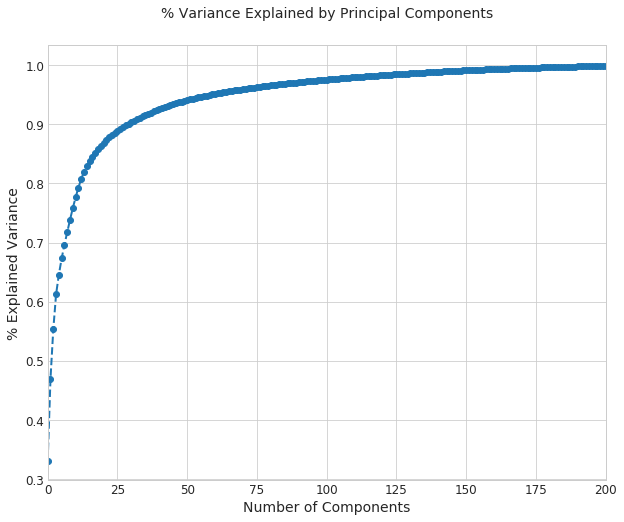

In [71]:
sns.set_style('whitegrid')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.xlim([0,200])
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.show()

In [79]:
pca=PCA(n_components=111,whiten=True,random_state=0)
X_pca_21=pca.fit_transform(scaled_X)
print("Variance explained using 111 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 111 components is: 0.979585891517


In [80]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_21,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [81]:
## Table to store training and test measures so we can compare later
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='3.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [82]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.893193837664


Predicted  False  True  __all__
Actual                         
False      26205  3496    29701
True         220  4871     5091
__all__    26425  8367    34792

The accuracy of the model on test data is: 0.88331992183


Predicted  False  True  __all__
Actual                         
False       6515   898     7413
True         117  1169     1286
__all__     6632  2067     8699

#### <a id='3.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [83]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.900523108761


Predicted  False  True  __all__
Actual                         
False      26376  3325    29701
True         136  4955     5091
__all__    26512  8280    34792

The accuracy of the model on test data is: 0.892516381193


Predicted  False  True  __all__
Actual                         
False       6593   820     7413
True         115  1171     1286
__all__     6708  1991     8699

#### <a id='3.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [84]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.902650034491


Predicted  False  True  __all__
Actual                         
False      26386  3315    29701
True          72  5019     5091
__all__    26458  8334    34792

The accuracy of the model on test data is: 0.892401425451


Predicted  False  True  __all__
Actual                         
False       6592   821     7413
True         115  1171     1286
__all__     6707  1992     8699

### <a id='4' style="text-decoration : none; color : #000000;">5. Comparing Results</a>

In [85]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

table_80_60_test['index']=indx
table_80_60_train['index']=indx

table_80_60_test.set_index(['index'],drop=True,inplace=True)
table_80_60_train.set_index(['index'],drop=True,inplace=True)

table_80_70_test['index']=indx
table_80_70_train['index']=indx

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)

In [86]:
display(table_80_50_train)
display(table_80_50_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.881467,4757.0,25911.0,3791.0,333.0,0.127635,0.065422
RandomForestClassifier,0.901012,4978.0,26370.0,3332.0,112.0,0.112181,0.022004
ExtraTreeClassifier,0.902679,5022.0,26384.0,3318.0,68.0,0.111710,0.013360


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.875848,1174.0,6445.0,967.0,113.0,0.130464,0.087801,0.890867
RandomForestClassifier,0.892172,1177.0,6584.0,828.0,110.0,0.111711,0.085470,0.901410
ExtraTreeClassifier,0.892057,1172.0,6588.0,824.0,115.0,0.111171,0.089355,0.899737


In [87]:
display(table_80_60_train)
display(table_80_60_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.888250,4735.0,26169.0,3532.0,356.0,0.118919,0.069927
RandomForestClassifier,0.897678,4943.0,26289.0,3412.0,148.0,0.114878,0.029071
ExtraTreeClassifier,0.899718,5006.0,26297.0,3404.0,85.0,0.114609,0.016696


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.886194,1178.0,6531.0,882.0,108.0,0.118980,0.083981,0.898519
RandomForestClassifier,0.890562,1181.0,6566.0,847.0,105.0,0.114259,0.081649,0.902046
ExtraTreeClassifier,0.889987,1177.0,6565.0,848.0,109.0,0.114394,0.084759,0.900424


In [88]:
display(table_80_70_train)
display(table_80_70_test)

,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.893194,4871.0,26205.0,3496.0,220.0,0.117706,0.043214
RandomForestClassifier,0.900523,4955.0,26376.0,3325.0,136.0,0.111949,0.026714
ExtraTreeClassifier,0.902650,5019.0,26386.0,3315.0,72.0,0.111612,0.014143


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.883320,1169.0,6515.0,898.0,117.0,0.121139,0.090980,0.893941
RandomForestClassifier,0.892516,1171.0,6593.0,820.0,115.0,0.110616,0.089425,0.899979
ExtraTreeClassifier,0.892401,1171.0,6592.0,821.0,115.0,0.110751,0.089425,0.899912


#### We can see from the results that feature transformations combined with feature selection does not fare well as compared to other two approaches. Hence we will graphically compare the results of other two approaches

In [89]:
trace0 = go.Scatter(x=table_80_50_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_50_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_50_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

In [90]:
trace0 = go.Scatter(x=table_80_70_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_70_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_70_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

#### Both the Extra Tree Model and Random Forest Classifier perform well.  We can try to improve the results by perfroming Grid Search and hypertuning the parameters

### Lets try the same approaches using oversampling (SMOTE technique) to see if we can improve the results

In [91]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['a_count',
 'a_href_.aspx',
 'a_href_.com',
 'a_href_.htm',
 'a_href_.html',
 'a_href_.pdf',
 'a_href_.php',
 'a_href_0',
 'a_href_absolute',
 'a_href_http',
 'a_href_https',
 'a_href_mailto',
 'a_href_out_of_domain',
 'a_href_relative',
 'a_href_script_javascript',
 'a_rel_nofollow',
 'article_count',
 'aside_count',
 'b_count',
 'base_count',
 'base_href_absolute',
 'base_href_out_of_domain',
 'base_href_relative',
 'br_count',
 'button_count',
 'center_count',
 'dd_count',
 'div_count',
 'dl_count',
 'dt_count',
 'em_count',
 'fieldset_count',
 'figure_count',
 'font_count',
 'footer_count',
 'form_action_.php',
 'form_action_absolute',
 'form_action_http',
 'form_action_https',
 'form_action_out_of_domain',
 'form_action_relative',
 'form_count',
 'form_enctype_application/x-www-form-urlencoded',
 'h1_count',
 'header_count',
 'hr_count',
 'i_count',
 'iframe_count',
 'iframe_sandbox_allow_same_origin_count',
 'iframe_sandbox_allow_scripts_count',
 'iframe_src_.com',
 'iframe_src_

In [92]:
### Preparing our training and test sets
X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

The train/test split ratio is 80:20


In [93]:
## Table to store training and test measures so we can compare later
table_80_80_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_80_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [94]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.933826004983


Predicted  False   True  __all__
Actual                          
False      25868   3834    29702
True          97  29605    29702
__all__    25965  33439    59404

The accuracy of the model on test data is: 0.875732842856


Predicted  False  True  __all__
Actual                         
False       6399  1013     7412
True          68  1219     1287
__all__     6467  2232     8699

In [95]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.947612955357


Predicted  False   True  __all__
Actual                          
False      26973   2729    29702
True         383  29319    29702
__all__    27356  32048    59404

The accuracy of the model on test data is: 0.907460627658


Predicted  False  True  __all__
Actual                         
False       6721   691     7412
True         114  1173     1287
__all__     6835  1864     8699

In [96]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_href_relative,0.153395
link_href_out_of_domain,0.143576
script_src_relative,0.132236
a_href_out_of_domain,0.079845
img_src_absolute,0.074030
script_src_.js,0.069721
link_href_absolute,0.061097
a_count,0.021028
meta_count,0.012097
title_count,0.008037


In [97]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.948168473503


Predicted  False   True  __all__
Actual                          
False      26979   2723    29702
True         356  29346    29702
__all__    27335  32069    59404

The accuracy of the model on test data is: 0.90642602598


Predicted  False  True  __all__
Actual                         
False       6723   689     7412
True         125  1162     1287
__all__     6848  1851     8699

In [98]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
link_href_.css,0.053229
input_count,0.050477
link_rel_canonical,0.043070
script_src_https,0.041375
meta_http-equiv_X-UA-Compatible,0.039835
link_rel_stylesheet,0.038905
script_type_text/javascript,0.028221
link_type_text/css,0.026239
link_href_.ico,0.020625
meta_charset_utf-8,0.019825


In [99]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

### Lets now see the results of undersampling. 

In [100]:
df_non=df[df.Target==0]
df_mal=df[df.Target==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Target.value_counts() 

X=df_u[columns]
y=df_u.Target.values

feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12754, 1461)


,a_charset_utf-8,a_count,a_download_download,a_hidden_true,a_href_.7z,a_href_.apk,a_href_.app,a_href_.asp,a_href_.aspx,a_href_.au,a_href_.avi,a_href_.b,a_href_.bin,a_href_.br,a_href_.bz2,a_href_.ca,a_href_.cat,a_href_.cc,a_href_.cfm,a_href_.cgi,a_href_.ch,a_href_.chn,a_href_.cl,a_href_.cms,a_href_.com,a_href_.csp,a_href_.css,a_href_.data,a_href_.de,a_href_.dmg,a_href_.do,a_href_.doc,a_href_.docx,a_href_.dot,a_href_.dz,a_href_.end,a_href_.exe,a_href_.fx,a_href_.gif,a_href_.gsp,a_href_.gz,a_href_.htm,a_href_.html,a_href_.i,a_href_.id,a_href_.io,a_href_.iso,a_href_.it,a_href_.jhtml,a_href_.jpeg,a_href_.jpg,a_href_.js,a_href_.jsf,a_href_.json,a_href_.jsp,a_href_.lnk,a_href_.m3u,a_href_.md,a_href_.me,a_href_.mhp,a_href_.mp3,a_href_.mp4,a_href_.mpl,a_href_.mvc,a_href_.net,a_href_.ogg,a_href_.org,a_href_.pcf,a_href_.pd,a_href_.pdf,a_href_.php,a_href_.phtml,a_href_.pk,a_href_.pl,a_href_.pls,a_href_.png,a_href_.prd,a_href_.pro,a_href_.rar,a_href_.rdf,a_href_.rf,a_href_.rss,a_href_.ru,a_href_.shtml,a_href_.spa,a_href_.svg,a_href_.swf,a_href_.tag,a_href_.tmpl,a_href_.tr,a_href_.tsp,a_href_.tv,a_href_.txt,a_href_.vid,a_href_.wml,a_href_.wmv,a_href_.x,a_href_.xhtml,a_href_.xls,a_href_.xlsx,a_href_.xml,a_href_.xxx,a_href_.xyz,a_href_.xz,a_href_.zip,a_href_0,a_href_0.1,a_href_0.2,a_href_absolute,a_href_ftp,a_href_http,a_href_https,a_href_irc,a_href_mailto,a_href_out_of_domain,a_href_relative,a_href_script_javascript,a_hreflang_am,a_hreflang_ar,a_hreflang_az,a_hreflang_bs,a_hreflang_ca,a_hreflang_cs,a_hreflang_de,a_hreflang_el,a_hreflang_en,a_hreflang_en-gb,a_hreflang_en-us,a_hreflang_es,a_hreflang_es-ES,a_hreflang_fi,a_hreflang_fr,a_hreflang_hu,a_hreflang_id,a_hreflang_it,a_hreflang_ja,a_hreflang_ko,a_hreflang_ml,a_hreflang_nl,a_hreflang_no,a_hreflang_pl,a_hreflang_pt,a_hreflang_pt-br,a_hreflang_ro,a_hreflang_ru,a_hreflang_sv,a_hreflang_tr,a_hreflang_und,a_hreflang_zh,a_hreflang_zh-hans,a_hreflang_zxx,a_lang_a1,a_lang_ar,a_lang_bg,a_lang_ca,a_lang_cs,a_lang_da,a_lang_de,a_lang_el,a_lang_en,a_lang_en-GB,a_lang_en-US,a_lang_es,a_lang_es-ES,a_lang_fi,a_lang_fr,a_lang_he,a_lang_hi,a_lang_hr,a_lang_hu,a_lang_id,a_lang_it,a_lang_ja,a_lang_ko,a_lang_nl,a_lang_pl,a_lang_pt,a_lang_ro,a_lang_ru,a_lang_sk,a_lang_sv,a_lang_th,a_lang_tr,a_lang_vi,a_lang_zh,a_referrerpolicy_unsafe-url,a_rel_ nofollow,a_rel_ noopener,a_rel_ noopener noreferrer,a_rel_ noreferrer noopener,"a_rel_""nofollow""",a_rel_#modal-overlay,a_rel_#modalExternalSiteCluetip,a_rel_#selectFiliale,a_rel_'nofollow',a_rel_0,a_rel_1,a_rel_10,a_rel_11,a_rel_12,a_rel_13,a_rel_14,a_rel_15,a_rel_16,a_rel_17,a_rel_2,a_rel_3,a_rel_4,a_rel_5,a_rel_6,a_rel_7,a_rel_8,a_rel_9,a_rel_<strong>@font-face Embedding</strong> - this free license allows you to embed the font in your websites with CSS.,a_rel_<strong>Commercial Desktop Use</strong> - this free license allows you to create commercial graphics and documents.,a_rel_Akamai-prefetch,a_rel_Dofollow,a_rel_F,a_rel_Lightbox,a_rel_Menu,a_rel_NOFOLLOW,a_rel__blank,a_rel_about,a_rel_accounts,a_rel_ajaxcontentarea,a_rel_alternate,a_rel_alternate noopener noreferrer,a_rel_archive,a_rel_article,a_rel_attachment,a_rel_author,a_rel_author external,a_rel_author source external,a_rel_blank,a_rel_bookmark,a_rel_bookmark noopener,a_rel_box,a_rel_canonical,a_rel_category,a_rel_category tag,a_rel_category tag noopener noreferrer,a_rel_chapter,a_rel_chartPopup nofollow,a_rel_cklog,a_rel_contact,a_rel_contents,a_rel_countrycontainer,a_rel_date,a_rel_ddsubmenuside1,a_rel_default,...,object_data_http,object_data_https,object_data_out_of_domain,object_data_relative,object_style_display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1;,object_style_display: none;,object_type_application/x-shockwave-flash,object_type_image/svg+xml,object_type_text/html,ol_count,optgroup_count,option_count,output_count,p_count,param_count,picture_count,pre_count,progress_count,q_count,s_count,samp_count,script_async

In [101]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)


The train/test split ratio is 80:20


In [102]:
## Table to store training and test measures so we can compare later
table_80_90_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_90_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [103]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.929138488697


Predicted  False  True  __all__
Actual                         
False       4529   619     5148
True         104  4951     5055
__all__     4633  5570    10203

The accuracy of the model on test data is: 0.911015288122


Predicted  False  True  __all__
Actual                         
False       1078   151     1229
True          76  1246     1322
__all__     1154  1397     2551

In [104]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.945114182103


Predicted  False  True  __all__
Actual                         
False       4671   477     5148
True          83  4972     5055
__all__     4754  5449    10203

The accuracy of the model on test data is: 0.917679341435


Predicted  False  True  __all__
Actual                         
False       1118   111     1229
True          99  1223     1322
__all__     1217  1334     2551

In [105]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_href_relative,0.154806
link_href_out_of_domain,0.144060
script_src_relative,0.128079
a_href_out_of_domain,0.080054
script_src_.js,0.066251
img_src_absolute,0.064862
link_href_absolute,0.058862
a_count,0.031841
script_count,0.012359
img_src_relative,0.009692


In [106]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.948446535333


Predicted  False  True  __all__
Actual                         
False       4675   473     5148
True          53  5002     5055
__all__     4728  5475    10203

The accuracy of the model on test data is: 0.916111328891


Predicted  False  True  __all__
Actual                         
False       1118   111     1229
True         103  1219     1322
__all__     1221  1330     2551

In [107]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
link_rel_canonical,0.071421
link_rel_stylesheet,0.059221
input_count,0.055032
link_href_.css,0.045670
meta_http-equiv_X-UA-Compatible,0.038845
script_src_https,0.032449
link_type_text/css,0.031439
link_rel_icon,0.023202
script_async_true,0.022914
link_type_image/x-icon,0.022398


In [108]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

In [110]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')